In [1]:
# project: p2
# submitter: hhess3
# partner: none
# hours: 9

In [2]:
import loans
import json
import zipfile
import csv
import os
import search
import time
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
uwcu = loans.Bank("University of Wisconsin Credit Union")

In [5]:
#Q1
bank = loans.Bank("First Home Bank")

total_interest_rate = 0
valid_loan_count = 0
average_interest_rate = 0

for loan in bank.loans:
    if loan.interest_rate >= 0:
        total_interest_rate += loan.interest_rate
        valid_loan_count += 1
        
    if valid_loan_count > 0:
        average_interest_rate = total_interest_rate / valid_loan_count
average_interest_rate

2.8333333333333335

In [6]:
#Q2
total_applicant_count = 0

for loan in bank.loans:
    total_applicant_count += len(loan.applicants) 
    
if len(bank.loans) > 0:
    average_applicants_per_loan = total_applicant_count / len(bank.loans)
average_applicants_per_loan

1.3043478260869565

In [7]:
#Q3
age_distribution = {}

for loan in bank.loans:
    for applicant in loan.applicants:
        age_group = applicant.age
        if age_group in age_distribution:
            age_distribution[age_group] += 1
            continue
        age_distribution[age_group] = 1
        
age_distribution

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '35-44': 1, '>74': 3}

In [8]:
print({'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '>74': 3, '35-44': 1})

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '>74': 3, '35-44': 1}


In [9]:
#Q4
bank_bst = search.BST()

for loan in bank.loans:
    bank_bst.add(loan.interest_rate, loan)

missing_nums = len(bank_bst["-1"]) 
missing_nums

11

In [10]:
#Q5
def height(node):
    if node == None: 
        return -1 
    
    left_height = height(node.left)
    right_height = height(node.right)
    
    return max(left_height, right_height) + 1

bank_height = height(bank_bst.root)
bank_height

5

In [11]:
uwcu_bank = loans.Bank("University of Wisconsin Credit Union")
uwcu_bank_bst = search.BST()

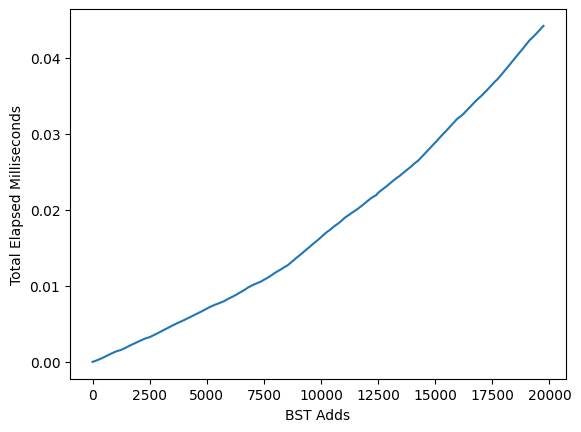

In [12]:
#Q6
loans_added = []
time_elapsed = []
sum_time_elapsed = 0 
for loan in uwcu.loans:
    first_time = time.time()
    uwcu_bank_bst.add(loan.interest_rate, loan)
    sum_time_elapsed += time.time() - first_time
    loans_added.append(uwcu.loans.index(loan))
    time_elapsed.append(sum_time_elapsed)

plt.plot(loans_added, time_elapsed)
plt.xlabel('BST Adds')
plt.ylabel('Total Elapsed Milliseconds')
plt.show()

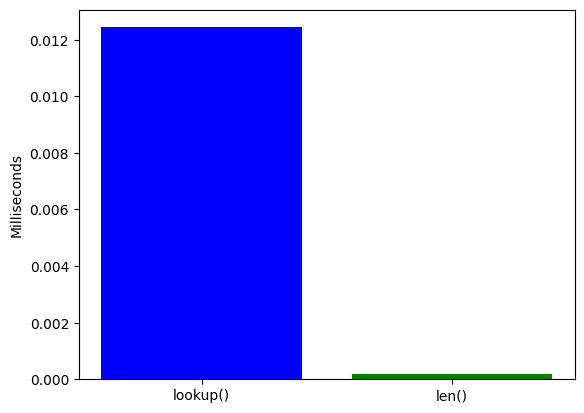

In [13]:
#Q7
lookup_elapsed_time = 0
len_elapsed_time = 0

for loan in uwcu.loans:
    first_time = time.time()
    uwcu_bank_bst["-1"]
    lookup_elapsed_time += time.time() - first_time
    
len(uwcu_bank_bst[-1])
len_elapsed_time = time.time() - first_time

plt.bar(["lookup()", "len()"], [lookup_elapsed_time, len_elapsed_time], color=["blue", "green"])
plt.ylabel('Milliseconds')
plt.show()

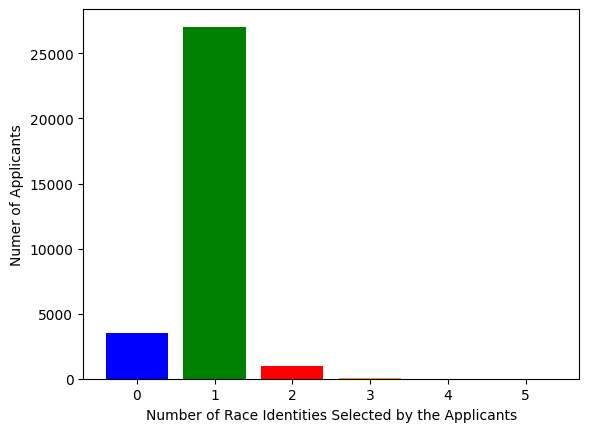

In [14]:
#Q8
dict_race = {}

for loan in uwcu.loans:
    for applicant in loan.applicants:
        races_total = str(len(applicant.race))
        if races_total in dict_race:
            dict_race[races_total] += 1
        else:
            dict_race[races_total] = 1
            
dict_race = dict(sorted(dict_race.items()))

plt.bar(list(dict_race.keys()), list(dict_race.values()), color=["blue", "green", "red", "orange", "teal", "purple"])
plt.ylabel("Numer of Applicants")
plt.xlabel("Number of Race Identities Selected by the Applicants")
plt.show()

In [15]:
#Q9
def count_leaf_nodes(root):
    if root is None:
        return 0
    elif root.left is None and root.right is None:
        return 1
    else:
        left_leaves = count_leaf_nodes(root.left)
        right_leaves = count_leaf_nodes(root.right)
        return left_leaves + right_leaves
leaf_count = count_leaf_nodes(uwcu_bank_bst.root)
leaf_count

13

In [16]:
#Q10 
max_interest_rates = []
for loan in uwcu.loans:
    if loan.interest_rate not in max_interest_rates:
        max_interest_rates.append(loan.interest_rate)
max_interest_rates = sorted(max_interest_rates, reverse = True)
fifth_biggest_interest_rate = max_interest_rates[4]
fifth_biggest_interest_rate 

6.49